In [0]:
import numpy as np
import torch

# Install Deep Graph Library : https://www.dgl.ai/

In [2]:
pip install dgl

     |████████████████████████████████| 747kB 2.8MB/s 


In [0]:
import networkx as nx
import dgl


In [0]:
nx.nx.Graph??

# Obtain pre-defined graphs from NetworkX

### Networkx graphs are undirected where as DGL graphs are directed  (slide)

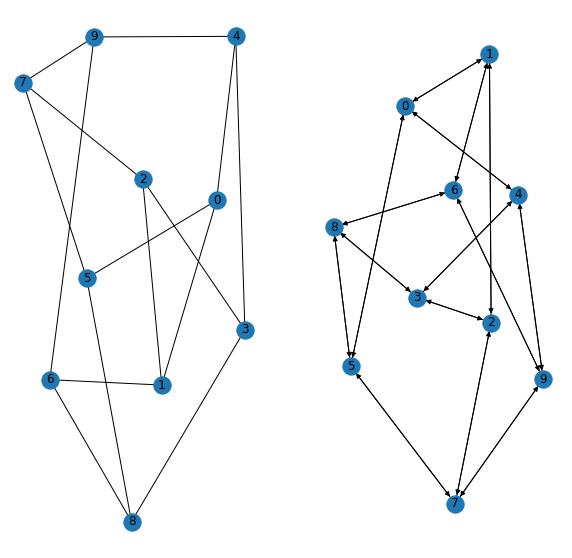

In [5]:
g_nx = nx.petersen_graph() # -- a graph with 10 vertices and 15 edges ------ #
g_dgl = dgl.DGLGraph(g_nx)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10
plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)

plt.show()

In [0]:
dgl.DGLGraph??

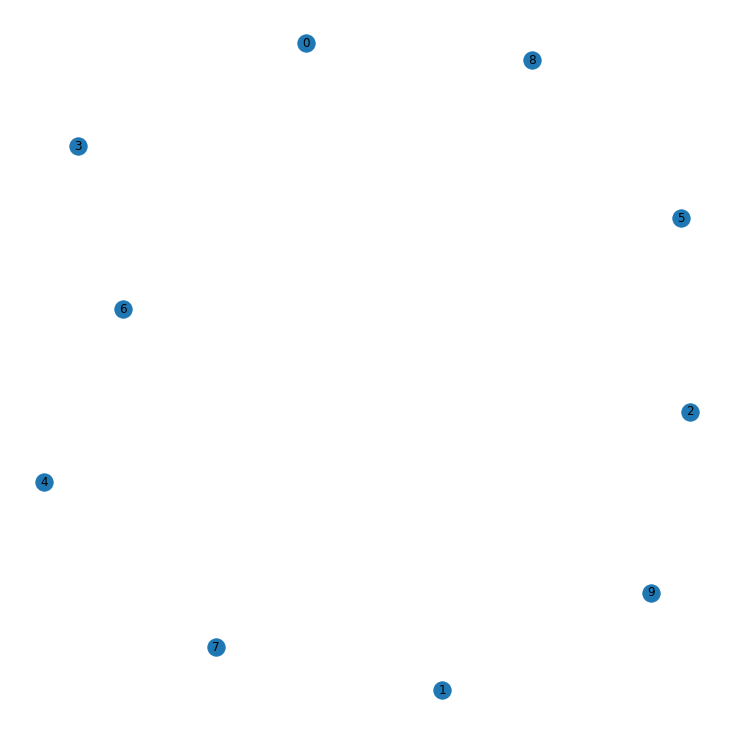

In [7]:
import dgl
import torch as th

g = dgl.DGLGraph()
g.add_nodes(10)
# # a couple edges one-by-one
# for i in range(1, 4):
#     g.add_edge(i, 0)
# # a few more with a paired list
# src = list(range(5, 8)); dst = [0]*3
# g.add_edges(src, dst)
# # finish with a pair of tensors
# src = th.tensor([8, 9]); dst = th.tensor([0, 0])
# g.add_edges(src, dst)

# # edge broadcasting will do star graph in one go!
# g.clear(); g.add_nodes(10)
# src = th.tensor(list(range(1, 10)));
# g.add_edges(src, 0)

import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

### Define the edges with a start-node and an end-node

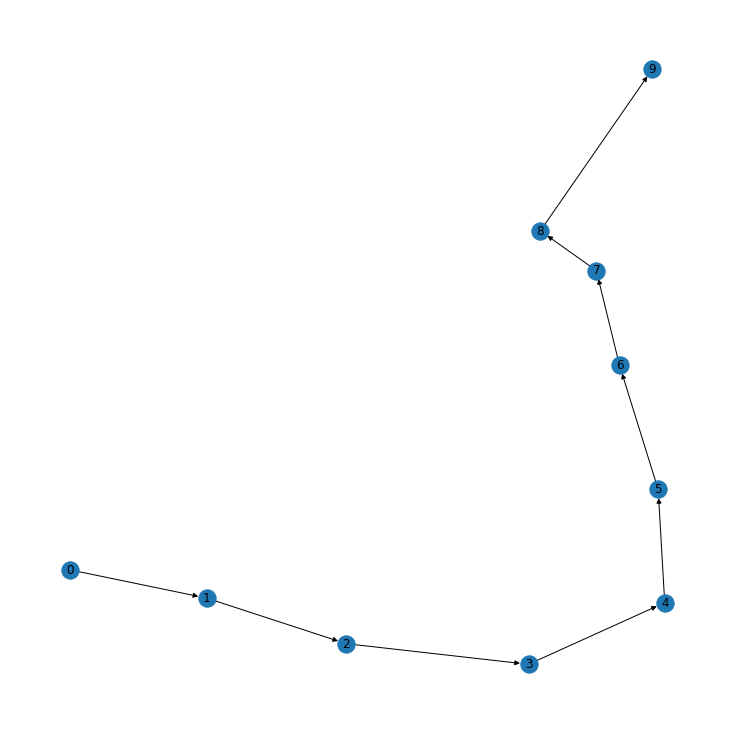

In [8]:
for i in range(0, 9):
    g.add_edge(i, i+1)
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

### How to access the nodes ?

In [9]:
g.nodes()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Adding features to nodes and edges

In [0]:
g = dgl.DGLGraph()
g.add_nodes(10)

In [11]:
g.nodes[1]

NodeSpace(data={})

### Assigning features to all the nodes at once 

In [0]:
x = th.randn(10, 3)
g.ndata['x'] = x # -- assigning a name to the feature : 'x'

In [13]:
x

tensor([[ 0.9626, -0.8103,  1.7789],
        [-0.6961, -0.5805,  0.6257],
        [ 0.6865,  0.2573,  0.6973],
        [-0.5029,  0.4347, -1.1666],
        [-0.4805, -0.4171, -0.7422],
        [-0.1815,  0.8353,  0.1946],
        [ 0.2040,  0.8165, -0.4438],
        [ 0.2351, -0.2054,  0.0954],
        [ 2.9318,  0.5377, -1.5168],
        [-0.8997, -2.7184,  0.7746]])

In [14]:
g.ndata

{'x': tensor([[ 0.9626, -0.8103,  1.7789],
        [-0.6961, -0.5805,  0.6257],
        [ 0.6865,  0.2573,  0.6973],
        [-0.5029,  0.4347, -1.1666],
        [-0.4805, -0.4171, -0.7422],
        [-0.1815,  0.8353,  0.1946],
        [ 0.2040,  0.8165, -0.4438],
        [ 0.2351, -0.2054,  0.0954],
        [ 2.9318,  0.5377, -1.5168],
        [-0.8997, -2.7184,  0.7746]])}

### Extracting the feature for any particular node

In [15]:
g.nodes[0].data['x']

tensor([[ 0.9626, -0.8103,  1.7789]])

###  What if I want to assign features to any individual node ?

In [0]:
# access node set with integer, list, or integer tensor
g.nodes[0].data['x'] = 2 * th.ones(1, 3)
g.nodes[[1, 2]].data['x'] = th.zeros(2, 3)


In [17]:
g.nodes[0].data['x']

tensor([[2., 2., 2.]])

### Another way to add edges at one go

In [0]:
# edge broadcasting will do star graph in one go!
g.clear(); g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
g.add_edges(src, 0)

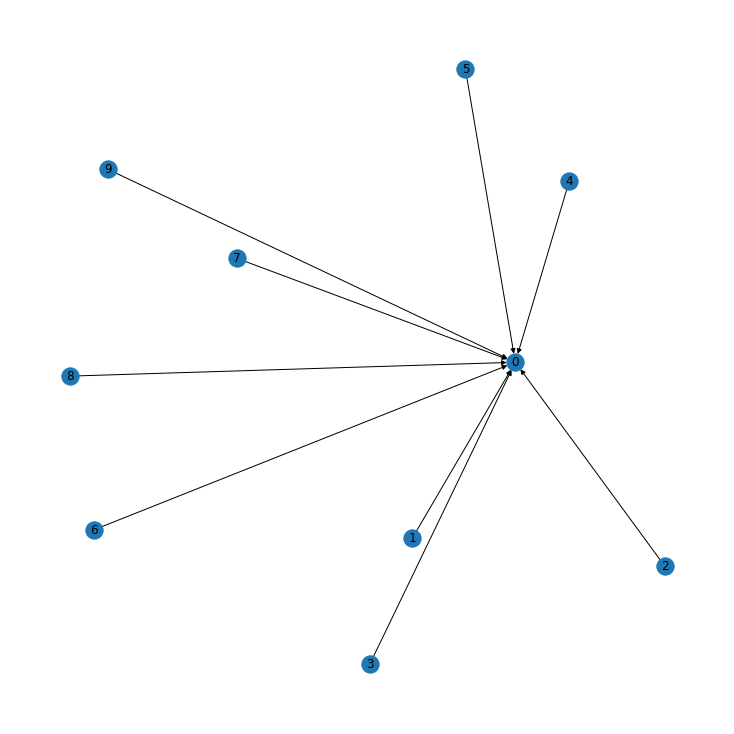

In [19]:
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

### Adding feature to edges in two different ways 

In [0]:
g.edata['w'] = th.randn(9, 2)

# access edge set with IDs in integer, list, or integer tensor
g.edges[1].data['w'] = th.randn(1, 2)
g.edges[[0, 1, 2]].data['w'] = th.zeros(3, 2)
g.edges[th.tensor([0, 1, 2])].data['w'] = th.zeros(3, 2)

# one can also access the edges by giving endpoints
g.edges[1, 0].data['w'] = th.ones(1, 2)                 # edge 1 -> 0
g.edges[[1, 2, 3], [0, 0, 0]].data['w'] = th.ones(3, 2) # edges [1, 2, 3] -> 0

In [0]:
x = th.randn(10, 3)
g.ndata['x'] = x

In [22]:
g.ndata

{'x': tensor([[ 1.2722,  0.4464,  0.6957],
        [ 0.1222, -0.5763,  0.3024],
        [-0.4611,  0.2771, -1.8255],
        [-0.7621, -0.4749, -0.4648],
        [ 0.1106,  0.1444, -0.7408],
        [-0.6884,  0.7817, -0.4137],
        [ 1.2511,  0.6853,  0.5542],
        [-0.1849,  1.0030, -1.2874],
        [-0.6947, -0.2339,  1.7514],
        [ 0.7672, -1.5989, -0.8318]])}

### How to access the edge start and end points ?

In [23]:
g.edges()

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0]))

### How to acceess the data on the edges ?

In [24]:
g.edges[6, 0]

EdgeSpace(data={'w': tensor([[-0.3863, -2.2558]])})

# GRAPH Classification with DGL 

In [0]:
from dgl.data import MiniGCDataset

In [0]:
MiniGCDataset??

In [0]:
dataset = MiniGCDataset(80, 10, 20)

In [28]:
dataset.graphs 

[DGLGraph(num_nodes=18, num_edges=54,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=12, num_edges=36,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=11, num_edges=33,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=12, num_edges=36,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=10, num_edges=30,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=12, num_edges=36,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=19, num_edges=57,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=17, num_edges=51,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=11, num_edges=33,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=10, num_edges=30,
          ndata_schemes={}
          edata_schemes={}), DGLGraph(num_nodes=11, num_edges=31,
          ndata_schemes={}
     

In [29]:
type(dataset.labels), type(dataset.graphs)

(list, list)

In [30]:
dataset.max_num_v, dataset.num_classes

(20, 8)

In [31]:
len(dataset.graphs)

80

In [32]:
np.where( np.array(dataset.labels) == 2)

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)

In [0]:
class_names ={   
   0 : 'cycle graph',
   1 : 'star graph',
   2 : 'wheel graph',
   3 : 'lollipop graph',
   4 : 'hypercube graph',
   5 : 'grid graph',
   6 : 'clique graph',
   7 : 'circular ladder graph',
}

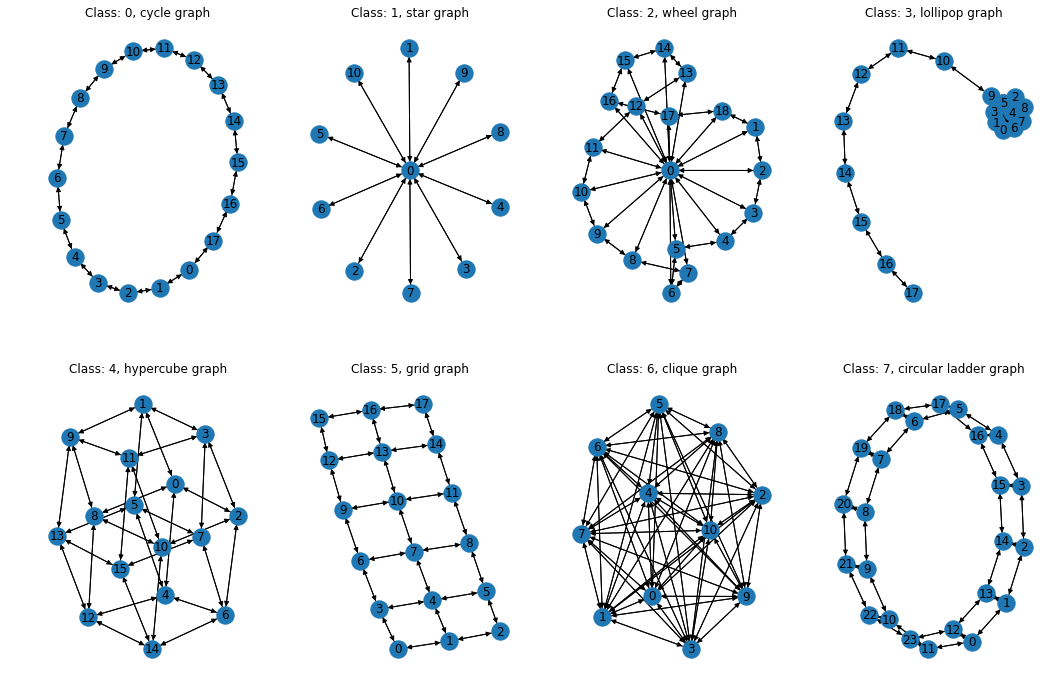

In [34]:
plt.rcParams["figure.figsize"]=18,12
fig, axes = plt.subplots(nrows=2, ncols=4)

iter = 0
for ax in axes.flatten() : 
    
    graph, label = dataset[10 * iter]
    
    nx.draw(graph.to_networkx(), with_labels=True, ax=ax)
    
    ax.set_title('Class: {:d}'.format(label) +', '+class_names[label] )
    
    iter += 1
  
plt.show()

# Message passing : A simple implementation

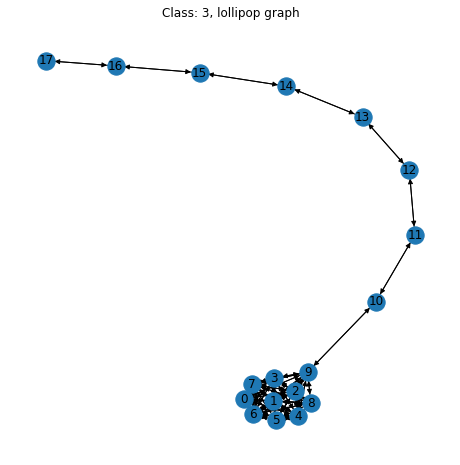

In [35]:
# -- lets pick up a graph from the above list ---- #
index_in_dataset = 3
graph, label = dataset[10 * index_in_dataset]

plt.rcParams["figure.figsize"]=8,8
fig, ax = plt.subplots()
nx.draw(graph.to_networkx(), with_labels=True, ax=ax)
ax.set_title('Class: {:d}'.format(label) +', '+class_names[label] )
plt.show()

## We can get the "in_degrees" of the graph, meaning a list of incoming nodes for each node.
### important: each node has a "self connection", it has an edge with itself

In [36]:
graph.nodes()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [37]:
graph.edges()

(tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
          6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17,  0,  1,
          2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9,  0,  2,  3,  4,  5,  6,  7,  8,  9,
          0,  1,  3,  4,  5,  6,  7,  8,  9,  0,  1,  2,  4,  5,  6,  7,  8,  9,
          0,  1,  2,  3,  5,  6,  7,  8,  9,  0,  1,  2,  3,  4,  6,  7,  8,  9,
          0,  1,  2,  3,  4,  5,  7,  8,  9,  0,  1,  2,  3,  4,  5,  6,  8,  9,
          0,  1,  2,  3,  4,  5,  6,  7,  9,  0,  1,  2,  3,  4,  5,  6,  7,  8,
         10, 11,  9, 10, 12, 11, 1

### For a vertex, the number of head ends adjacent to a vertex is called the indegree of the vertex and the number of tail ends adjacent to a vertex is its outdegree 

In [38]:
graph.in_degrees()

tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 11,  3,  3,  3,  3,  3,  3,  3,  2])

## A basic example of message passing
### Step 1: let's gives the nodes a feature, their own in_degree

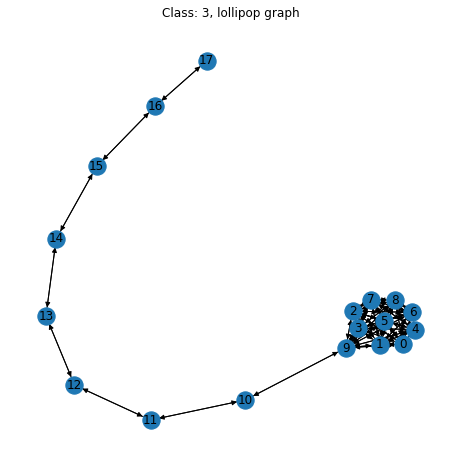

{'in_degree': tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 11,  3,  3,  3,  3,  3,  3,  3,  2])}


In [39]:
graph.ndata['in_degree'] = graph.in_degrees()

fig, ax = plt.subplots()
nx.draw(graph.to_networkx(), with_labels=True, ax=ax)
ax.set_title('Class: {:d}'.format(label) +', '+class_names[label])
plt.show()
print(graph.ndata)

### Step 2: create a function to collect the "messages" from a node neighberhood

In [40]:
import dgl.function as fn

def msg(edges):
    return {'message': edges.src['in_degree']}

graph.register_message_func(msg)

graph.send(graph.edges())
print(graph.ndata)

{'in_degree': tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 11,  3,  3,  3,  3,  3,  3,  3,  2])}


In [0]:
graph.register_message_func??

### Step 3: create a function to check the mailbox of each node and compute an updated node feature (slide)

In [41]:
def simple_reduce(nodes): 
    
    print(nodes.mailbox['message'])
    
    mean_over_mailbox = torch.mean(nodes.mailbox['message'].type(torch.FloatTensor), 1)

    return {'new_feature': mean_over_mailbox}


graph.register_reduce_func(simple_reduce)

for node_i in range(len(graph.nodes())):
    graph.recv(v=node_i)
    
print(graph.ndata)

tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 11, 10]])
tensor([[10, 10, 10, 10, 10, 10, 10, 10, 10,  3, 11]])
tensor([[11,  3,  3]])
tensor([[3, 3, 3]])
tensor([[3, 3, 3]])
tensor([[3, 3, 3]])
tensor([[3, 3, 3]])
tensor([[3, 3, 3]])
tensor([[3, 2, 3]])
tensor([[3, 2]])
{'in_degree': tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 11,  3,  3,  3,  3,  3,  3,  3,  2]), 'new_feature': tensor([10.1000, 10.1000, 10.1000, 10.1000, 10.1000, 10.1000, 10.1000, 10.1000,
        10.1000,  9.4545,  5.6667,  3.0000,  3.0000,  3.0000,  3.0000,  3.0000,
         2.6667,  2.5000])}


/usr/local/lib/python3.6/dist-packages/dgl/base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)


In [42]:
def msg(edges):
    return {'message': edges.src['in_degree']}

def simple_reduce(nodes): 
    mean_over_mailbox = torch.mean(nodes.mailbox['message'].type(torch.FloatTensor), 1)
    return {'new_feature': mean_over_mailbox}

graph.ndata['in_degree'] = graph.in_degrees()

graph.update_all(msg,simple_reduce)
print(graph.ndata)

{'in_degree': tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 11,  3,  3,  3,  3,  3,  3,  3,  2]), 'new_feature': tensor([10.1000, 10.1000, 10.1000, 10.1000, 10.1000, 10.1000, 10.1000, 10.1000,
        10.1000,  9.4545,  5.6667,  3.0000,  3.0000,  3.0000,  3.0000,  3.0000,
         2.6667,  2.5000])}


# Forming a graph minibatch

## In general different elements of a batch can have different shapes (slide)

In [0]:
def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs) # --- the batch function creates the minibatch out of sparse graphs --- #
    return batched_graph, torch.tensor(labels)

## Graph convolution (slide)

In [0]:
import dgl.function as fn
import torch
import torch.nn as nn


# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GN_block(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GN_block, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

## Our target is to classify each graph  (slide)


In [0]:
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GN_block(in_dim, hidden_dim, F.relu),
            GN_block(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float()
        h = h.cuda() # --- converting to gpu ---- #
        
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

In [0]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Create training and test sets.
trainset = MiniGCDataset(1000, 10, 20)
testset = MiniGCDataset(300, 10, 20)
validset = MiniGCDataset(200, 10, 20)
# Use PyTorch's DataLoader and the collate function
# defined before.
data_loader = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=collate)

val_data_loader = DataLoader(validset, batch_size=42, shuffle=True,
                         collate_fn=collate)

test_data_loader = DataLoader(testset, batch_size=42, shuffle=True,
                         collate_fn=collate)

# Create model
model = Classifier(1, 256, trainset.num_classes)
#model = model.cuda()

if torch.cuda.is_available():
    model = model.cuda()


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# model.train()


In [47]:
model

Classifier(
  (layers): ModuleList(
    (0): GN_block(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=1, out_features=256, bias=True)
      )
    )
    (1): GN_block(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=256, out_features=256, bias=True)
      )
    )
  )
  (classify): Linear(in_features=256, out_features=8, bias=True)
)

In [48]:

## --------- Run the training loop ------------------- ##

n_epoch = 200

epoch_losses, epoch_val_losses = [], []
for epoch in range(1, n_epoch+1):
    epoch_loss = 0
    iter_batch = 0
    model.train()
    for bg, label in data_loader:
            
        prediction = model(bg)
        
        loss = loss_func(prediction, label.cuda() )
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
        iter_batch += 1
    epoch_loss /= (iter_batch + 1)
    #print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)
    
    
    epoch_val_loss = 0
    iter_batch_val = 0
    model.eval()
    for bg, label in val_data_loader:
            
        prediction = model(bg)
        loss = loss_func(prediction, label.cuda() )
        epoch_val_loss += loss.detach().item()
        iter_batch_val += 1
    epoch_val_loss /= (iter_batch_val + 1)
    #print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_val_losses.append(epoch_val_loss)
    
    print('Epoch {}, loss {:.4f}, val_loss {:.4f}'.format(epoch, epoch_loss, epoch_val_loss))

/usr/local/lib/python3.6/dist-packages/dgl/base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)


Epoch 1, loss 1.8666, val_loss 1.4374
Epoch 2, loss 1.5938, val_loss 1.2140
Epoch 3, loss 1.3324, val_loss 1.0719
Epoch 4, loss 1.1585, val_loss 0.9115
Epoch 5, loss 1.0589, val_loss 0.8454
Epoch 6, loss 0.9668, val_loss 0.8649
Epoch 7, loss 0.9717, val_loss 0.7520
Epoch 8, loss 0.8671, val_loss 0.7183
Epoch 9, loss 0.8395, val_loss 0.7175
Epoch 10, loss 0.8617, val_loss 0.6653
Epoch 11, loss 0.7705, val_loss 0.6190
Epoch 12, loss 0.7678, val_loss 0.6049
Epoch 13, loss 0.7483, val_loss 0.5806
Epoch 14, loss 0.7004, val_loss 0.6060
Epoch 15, loss 0.7128, val_loss 0.5731
Epoch 16, loss 0.6861, val_loss 0.5358
Epoch 17, loss 0.6693, val_loss 0.5686
Epoch 18, loss 0.6401, val_loss 0.5538
Epoch 19, loss 0.6285, val_loss 0.4987
Epoch 20, loss 0.6173, val_loss 0.5176
Epoch 21, loss 0.6383, val_loss 0.4593
Epoch 22, loss 0.6179, val_loss 0.5047
Epoch 23, loss 0.5552, val_loss 0.4691
Epoch 24, loss 0.5621, val_loss 0.4287
Epoch 25, loss 0.5356, val_loss 0.4207
Epoch 26, loss 0.5096, val_loss 0.

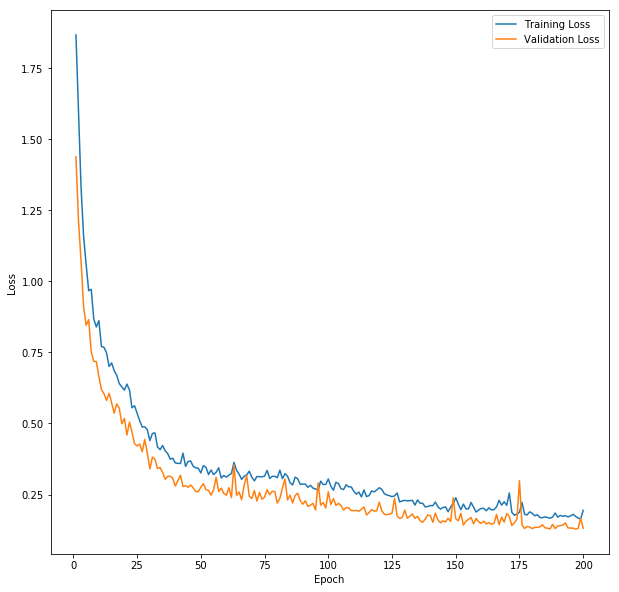

In [49]:
plt.rcParams["figure.figsize"]=10,10

plt.plot( range(1, n_epoch+1), np.array(epoch_losses), label='Training Loss' )
plt.plot( range(1, n_epoch+1), np.array(epoch_val_losses), label='Validation Loss' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
model.eval()
# Convert a list of tuples to two lists
test_X, test_Y = map(list, zip(*testset))
test_bg = dgl.batch(test_X)
test_Y = torch.tensor(test_Y).float().view(-1, 1)
probs_Y = torch.softmax(model(test_bg), 1)
sampled_Y = torch.multinomial(probs_Y.cpu() , 1)
argmax_Y = torch.max(probs_Y.cpu(), 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_Y == sampled_Y.float()).sum().item() / len(test_Y) * 100))
# print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
#     (test_Y == argmax_Y.float()).sum().item() / len(test_Y) * 100))

Accuracy of sampled predictions on the test set: 90.0000%


/usr/local/lib/python3.6/dist-packages/dgl/base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)


# How do we implement this model in fast.ai ?

In [0]:
import fastai
from fastai import *
from fastai.vision import *

In [0]:
import dgl
from dgl import BatchedDGLGraph as bg_custom
def custom_to(self,device='',non_blocking=True):
    return self

bg_custom.to = custom_to

In [0]:
def collate(samples):

    graphs, labels = map(list, zip(*samples))
    batched_graph = bg_custom(graphs,"__ALL__","__ALL__")
    
    return batched_graph, torch.tensor(labels)

In [0]:
data_loader_fi = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=collate)

val_data_loader_fi = DataLoader(validset, batch_size=42, shuffle=True,
                         collate_fn=collate)

### Create the databunch using fastai function

In [0]:
db = DataBunch(train_dl=data_loader_fi,valid_dl=val_data_loader_fi,collate_fn=collate)

In [56]:
model_fi = Classifier(1, 256, trainset.num_classes)
model_fi.train()
model_fi.cuda()

Classifier(
  (layers): ModuleList(
    (0): GN_block(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=1, out_features=256, bias=True)
      )
    )
    (1): GN_block(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=256, out_features=256, bias=True)
      )
    )
  )
  (classify): Linear(in_features=256, out_features=8, bias=True)
)

In [0]:
learn = Learner(db,model_fi,loss_func=nn.CrossEntropyLoss(),metrics=accuracy)